In [72]:
import numpy as np
import glob
import geopy
from geopy import distance
import matplotlib
import matplotlib.pyplot as plt
import haversine as hs
from scipy import interpolate
from scipy.spatial import ConvexHull
from haversine import Unit
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [50]:
folder = "/home/karina/TORTUGAS/PAPERtrayectorias/CONVEXHULL/ConvexHullNUEVASfiltradas05kmh"
filenames2020 = folder+"/*2020.txt.filtered"
filenames2021 = folder+"/*2021.txt.filtered"
files = glob.glob(filenames2020)
files2021 = glob.glob(filenames2021)
data2020 = []
data2021 = []
for i in files:
    data2020.append(np.loadtxt(i, unpack=True, usecols=(0, 1), skiprows=1))
for j in files:
    data2021.append(np.loadtxt(j, unpack=True, usecols=(0, 1), skiprows=1))


In [51]:
len(data2020)


10

In [52]:
# calculates min value of a list of lists
def get_min_value(self, listoflist):
    mins_lat = []
    mins_lon = []
    for i in range(0, len(listoflist)):
        min_lat = min(listoflist[i][0])
        min_lon = min(listoflist[i][1])
        mins_lat.append(min_lat)
        mins_lon.append(min_lon)
    minminlat = min(mins_lat)
    minminlon = min(mins_lon)

    return (minminlat, minminlon)


In [53]:
# This will be the origin for all the coordinates
Oesteorigenxcoord = get_min_value(0, data2020)[1]
Surorigenycoord = get_min_value(0, data2020)[0]
PointOriginSWlonglat = (Oesteorigenxcoord, Surorigenycoord)
print(PointOriginSWlonglat)


(-65.00215, -40.5865)


In [54]:
# creates a vector with the origincoords values but with size sizevector
def extendvec(coordorigin, sizevector):
    vecextended = np.repeat(np.array(coordorigin), sizevector)
    return vecextended


In [55]:
# create vector of origin with same size as data
vecorigenlong2020 = []
vecorigenlat2020 = []
for i in range(0, len(data2020)):
    vecorigenlong2020.append(extendvec(Oesteorigenxcoord, data2020[i][1].size))
    vecorigenlat2020.append(extendvec(Surorigenycoord, data2020[i][0].size))


In [56]:
yallpoints2020 = np.array([vecorigenlong2020[0], data2020[0][0]])
print(yallpoints2020[0][2], yallpoints2020[1][2])


-65.00215 -40.583035


In [63]:
distancias2020 = []

for i in range(0, len(data2020)):
    yallpoints2020 = np.array([vecorigenlong2020[i], data2020[i][0]])
    xallpoints2020 = np.array([data2020[i][1], vecorigenlat2020[i]])
    xdist2020meters = np.zeros(xallpoints2020[1].size)
    ydist2020meters = np.zeros(yallpoints2020[1].size)
    # print(xallpoints2020[i])

    for j in range(0, len(xdist2020meters)):
        pointx2020 = (xallpoints2020[0][j], xallpoints2020[1][j])
        pointy2020 = (yallpoints2020[0][j], yallpoints2020[1][j])
        xdist2020meters[j] = distance.distance(
            pointx2020, PointOriginSWlonglat).m
        ydist2020meters[j] = distance.distance(
            pointy2020, PointOriginSWlonglat).m
    distancias2020.append([xdist2020meters, ydist2020meters])


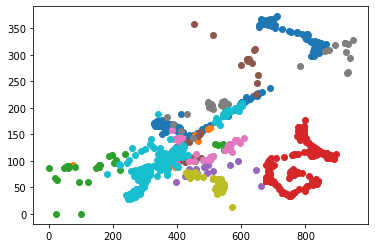

In [59]:
for i in range(0, len(distancias2020)):
    plt.plot(distancias2020[i][0], distancias2020[i][1], 'o')
plt.show()


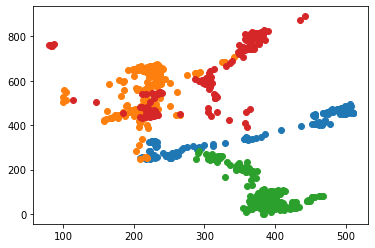

In [16]:
plt.plot(xdistT102021meters, ydistT102021meters, 'o')
plt.plot(xdistT302021meters, ydistT302021meters, 'o')
plt.plot(xdistT792021meters, ydistT792021meters, 'o')
plt.plot(xdistT1292021meters, ydistT1292021meters, 'o')
plt.show()


In [18]:
print(len(data2020))


10


In [60]:
# convex hull calculation
hulls2020 = []
areas2020 = np.zeros(len(data2020))
for i in range(0, len(data2020)):
    points2020 = np.stack(
        (distancias2020[i][0], distancias2020[i][1]), axis=-1)
    hull = ConvexHull(points2020)
    areas2020[i] = hull.area
    hulls2020.append(hull)
print(areas2020)


[1224.99818454  887.40190216 1222.06132716  545.34738839  643.43731178
  887.87027109  564.80109597 1245.67255337  474.99598852  939.61253058]


In [61]:
meanareas2020 = areas2020.mean()
stdareas2020 = areas2020.std()
print(meanareas2020)
print(stdareas2020)


863.6198553567581
283.2077472868963


In [22]:
print(areas2021.mean())
print(areas2021.std())


1011.2848737569163
277.675819461776


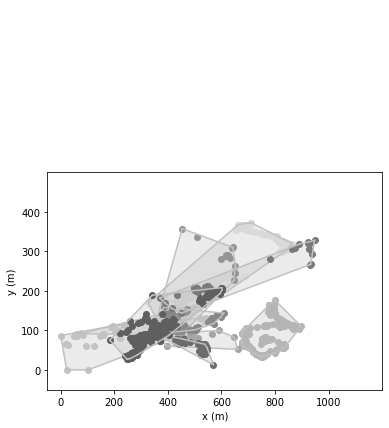

In [95]:
# Hull 2020
fig, ax = plt.subplots()
offset=5
vmin=np.array(-offset)
vmax=np.array(len(data2020)+offset)
norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
cmap=cm.get_cmap("Greys")


for i in range(0, len(data2020)):
    rgb=cmap(norm(i))
    #color=matplotlib.colors.rgb2hex(rgb)
    plt.plot(distancias2020[i][0], distancias2020[i][1], 'o',color=rgb)
    for simplex in hulls2020[i].simplices:
        plt.plot(distancias2020[i][0][simplex],
                 distancias2020[i][1][simplex], '-', color="silver")
    plt.fill(distancias2020[i][0][hulls2020[i].vertices],
             distancias2020[i][1][hulls2020[i].vertices], 'silver', alpha=0.3)

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.xlim((-50, 1200))
plt.ylim((-50, 500))
plt.xticks(np.arange(0, 1200, 200))
plt.yticks(np.arange(0, 500, 100))

ax.annotate('summer', (100, 900))

# salva el archivo a un formato png (dpi es la calidad)
plt.savefig('CHullIndividualsTortoises05kmfilter2021.png', dpi=520)

plt.show()


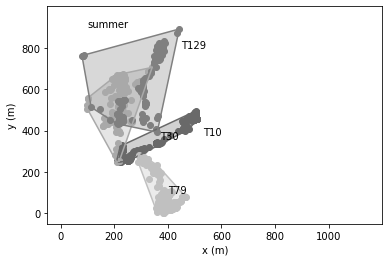

In [23]:
# Hull 2021
fig, ax = plt.subplots()
plt.plot(xdistT102021meters, ydistT102021meters, 'o', color="dimgrey")
plt.plot(xdistT302021meters, ydistT302021meters, 'o', color='darkgrey')
plt.plot(xdistT792021meters, ydistT792021meters, 'o', color='silver')
plt.plot(xdistT1292021meters, ydistT1292021meters, 'o', color='grey')

for simplex in hullT102021.simplices:
    plt.plot(xdistT102021meters[simplex],
             ydistT102021meters[simplex], '-', color="dimgrey")
for simplex in hullT302021.simplices:
    plt.plot(xdistT302021meters[simplex],
             ydistT302021meters[simplex], '-', color="darkgrey")
for simplex in hullT792021.simplices:
    plt.plot(xdistT792021meters[simplex],
             ydistT792021meters[simplex], '-', color="silver")
for simplex in hullT1292021.simplices:
    plt.plot(xdistT1292021meters[simplex],
             ydistT1292021meters[simplex], '-', color="grey")


plt.fill(xdistT102021meters[hullT102021.vertices],
         ydistT102021meters[hullT102021.vertices], 'dimgrey', alpha=0.3)
plt.fill(xdistT302021meters[hullT302021.vertices],
         ydistT302021meters[hullT302021.vertices], 'darkgrey', alpha=0.3)
plt.fill(xdistT792021meters[hullT792021.vertices],
         ydistT792021meters[hullT792021.vertices], 'silver', alpha=0.3)
plt.fill(xdistT1292021meters[hullT1292021.vertices],
         ydistT1292021meters[hullT1292021.vertices], 'grey', alpha=0.3)


ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.xlim((-50, 1200))
plt.ylim((-50, 1000))
plt.xticks(np.arange(0, 1200, 200))
plt.yticks(np.arange(0, 1000, 200))

ax.annotate('summer', (100, 900))

# names tortoises
ax.annotate('T10', (530, 380))  # dimgrey
ax.annotate('T129', (450, 800))  # grey
ax.annotate('T79', (400, 100))  # silver
ax.annotate('T30', (370, 360))  # darkgrey

# salva el archivo a un formato png (dpi es la calidad)
plt.savefig('CHullIndividualsTortoises05kmfilter2021.png', dpi=520)

plt.show()
